In [158]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [159]:
original = Image.open("original.jpg")
tampered = Image.open("tampered.png") 

In [160]:
original = original.resize((250, 160))
print(original.size)
original.save('original.jpg')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('tampered.png')

(250, 160)
(250, 160)


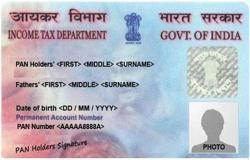

In [161]:
original

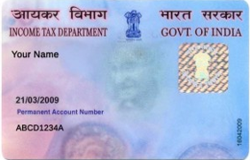

In [162]:
tampered

In [163]:
original = cv2.imread('original.jpg')
tampered = cv2.imread('tampered.png')
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [164]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.32271040956588465


In [165]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


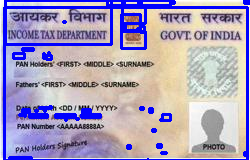

In [166]:
print('Original Format Image')
Image.fromarray(original)

Tampered Image


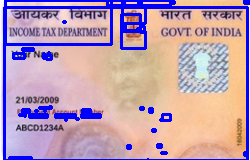

In [167]:
print('Tampered Image')
Image.fromarray(tampered)

Different Image


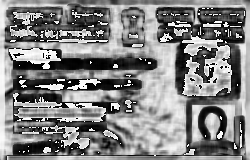

In [168]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


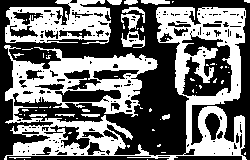

In [169]:
print('Threshold Image')
Image.fromarray(thresh)